In [4]:
%matplotlib inline
import numpy as np
import os
import gyrationZMagnet as gzm
from my_tools import get_next_name
import matplotlib.pyplot as plt

In [2]:
path = gzm.path
loadpath = f'{gzm.savepath}smeared_source/'
savepath = f'{gzm.savepath}smeared/'

In [3]:
# filelist = os.listdir(loadpath)

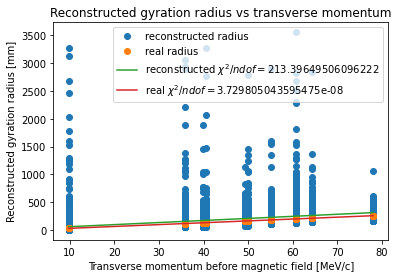

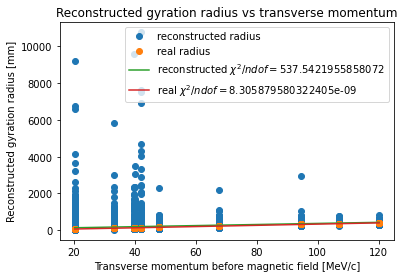

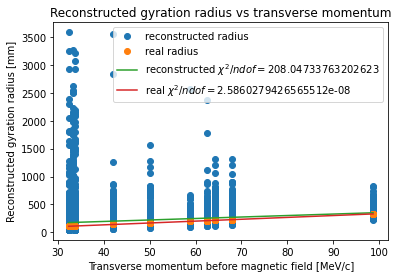

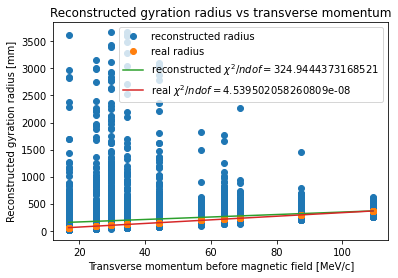

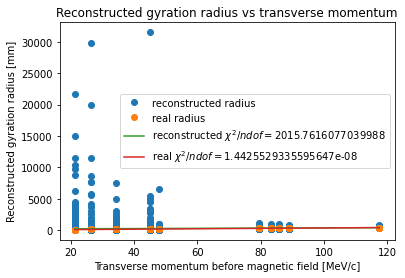

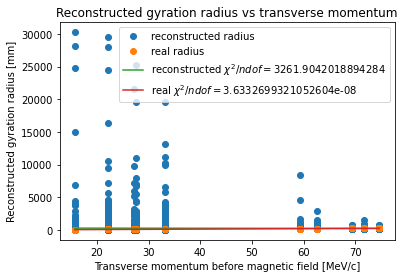

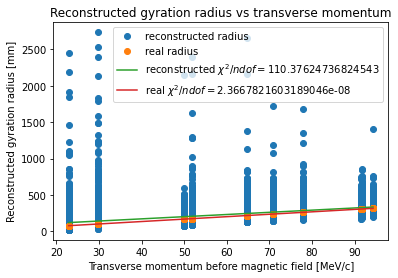

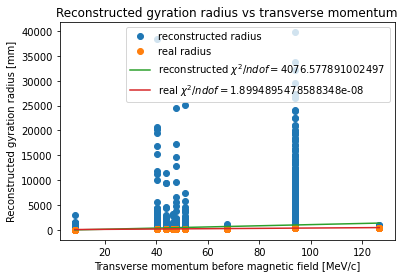

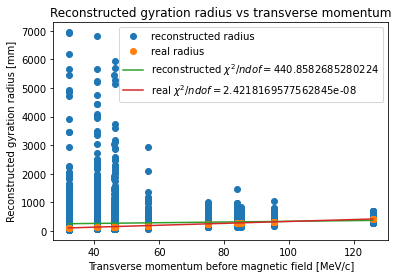

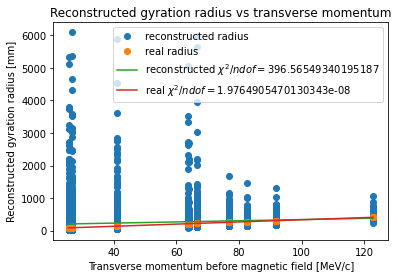

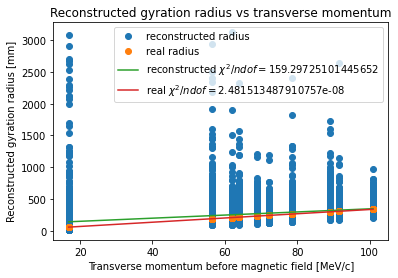

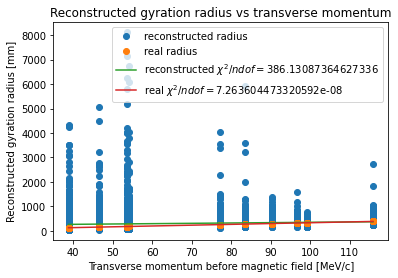

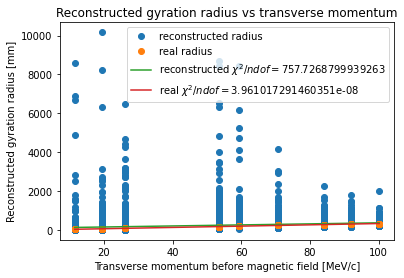

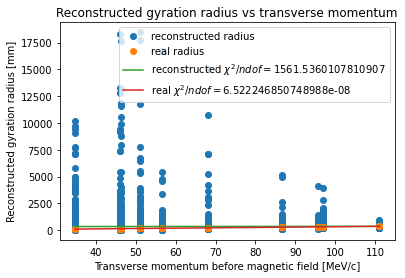

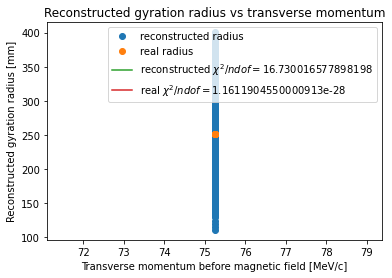

<Figure size 432x288 with 0 Axes>

In [4]:
# first = True
# doRejectOutliers=True
# for f in filelist:
#     data = np.genfromtxt(f'{loadpath}{f}', skip_header=1)
#     single_momenta = data[:,0]
#     single_radii = data[:,1]
#     single_radii_real = data[:,2]
    
#     if doRejectOutliers:
#         reject1 = gzm.reject_outliers(single_radii,3)
#         reject2 = gzm.reject_outliers(single_radii_real,3)
#         reject3 = single_radii_real>0
#         single_radii = single_radii[reject1*reject2*reject3]
#         single_radii_real = single_radii_real[reject1*reject2*reject3]
#         single_momenta = single_momenta[reject1*reject2*reject3]
        
#     gzm.fit_plot(single_momenta,single_radii,single_radii_real,True,f'smeared/rejOut_{f[:20]}')
    
#     if first:
#         momenta = single_momenta
#         radii = single_radii
#         radii_real   = single_radii_real
#         first = False
#     else:
#         momenta = np.concatenate((momenta,single_momenta),axis=0)
#         radii = np.concatenate((radii,single_radii),axis=0)
#         radii_real = np.concatenate((radii_real,single_radii_real),axis=0)
        
# np.savetxt(get_next_name(f'{savepath}rejout_all.csv'),np.stack([momenta,radii,radii_real],
#                                                                  axis=1),header='momentum,radius,real_radius')

In [7]:
data = np.loadtxt('/home/tsrunchev/Repositories/antimatter_detector/python/gyroradius_output/smeared/rejout_all_01.csv')

In [15]:
momenta, radii, radii_real = data[:,0],data[:,1],data[:,2]

In [10]:
gzm.fit_plot(momenta,radii,radii_real,True,f'smeared/all')

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>


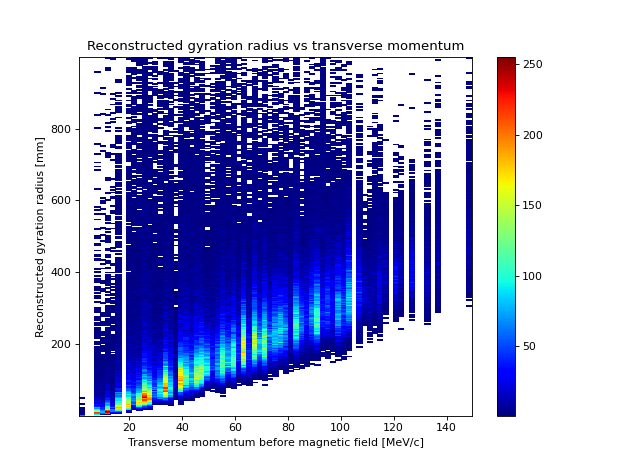

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(1,(8,6))
histmomenta = momenta[(radii>1)*(radii<1000)]
histradii = radii[(radii>1)*(radii<1000)]
plt.hist2d(histmomenta,histradii,bins=(75,440),cmap='jet',cmin=1)
# plt.yscale('log')
plt.title('Reconstructed gyration radius vs transverse momentum')
plt.xlabel('Transverse momentum before magnetic field [MeV/c]')
plt.ylabel('Reconstructed gyration radius [mm]')
plt.colorbar()

<IPython.core.display.Javascript object>


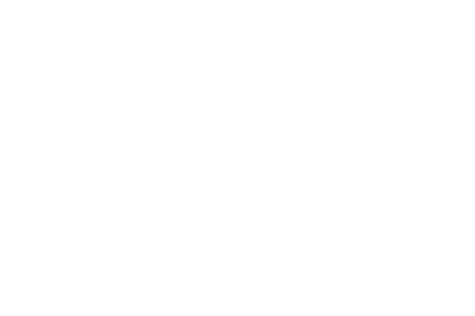

NameError: name 'single_momenta' is not defined

<IPython.core.display.Javascript object>


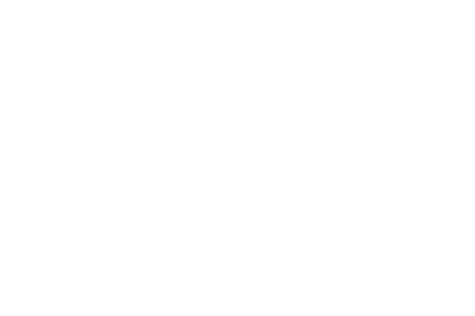

In [13]:
plt.figure(2)
dist_momenta = single_momenta[(single_momenta>55)&(single_momenta<63)]
dist_radii = single_radii[(single_momenta>55)&(single_momenta<63)]
plt.hist(dist_radii,bins=250)
plt.title('Distribution of smeared reconstructed gyration radius')
plt.xlabel('Reconstructed radius [mm]')

<IPython.core.display.Javascript object>


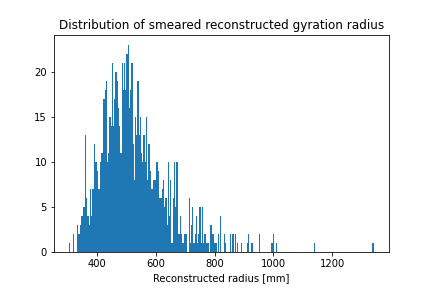

Text(0.5, 0, 'Reconstructed radius [mm]')

In [13]:
plt.figure(3)
dist_momenta = single_momenta[single_momenta>140]
dist_radii = single_radii[single_momenta>140]
plt.hist(dist_radii,bins=250)
plt.title('Distribution of smeared reconstructed gyration radius')
plt.xlabel('Reconstructed radius [mm]')

In [28]:
import pylandau
from scipy.optimize import curve_fit

/home/tsrunchev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


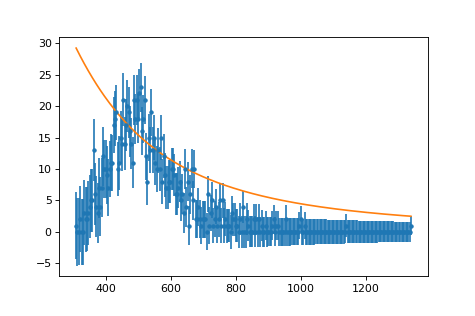

In [48]:
y,bin_edges = np.histogram(dist_radii,bins=250)
x = (bin_edges[1:]+bin_edges[:-1])/2
coeff, pcov = curve_fit(pylandau.langau, x, y,
                        sigma=1/np.sqrt(y),
                        absolute_sigma=True,
                        p0=[1,1,1,1],
                        bounds=(1, 1000))

# Plot
plt.figure(4)
plt.errorbar(x, y, np.sqrt(pylandau.langau(x, *coeff)), fmt=".")
plt.plot(x, pylandau.langau(x, *coeff), "-")
plt.show()

In [36]:
help(pylandau.langau)


Help on built-in function langau in module pylandau:

langau(...)
    langau(ndarray array, mpv=0, eta=1, sigma=1, A=1, scale_langau=True)
    Returns a Landau convoluded with a Gaus.
    
       If scale_langau is true the Langau function maximum is at mpv with amplitude A.
       Otherwise the Landau function maximum is at mpv with amplitude A, thus not the resulting Langau.



In [50]:
import scipy.stats as stats

<IPython.core.display.Javascript object>


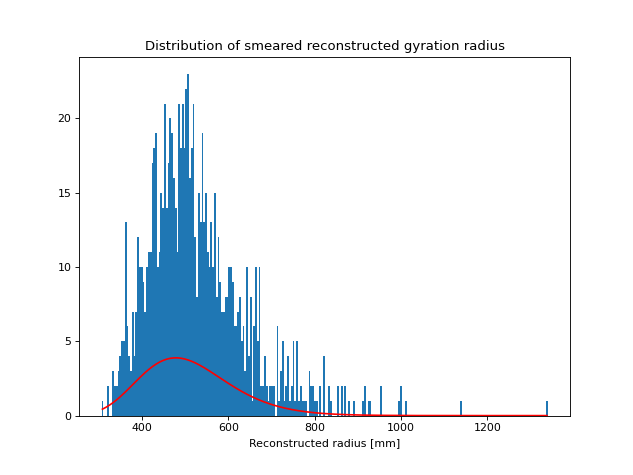

Text(0.5, 0, 'Reconstructed radius [mm]')

In [89]:
param = stats.lognorm.fit(dist_radii,floc=0)
plt.figure(5,(8,6))
pdf_fitted = stats.lognorm.pdf(x, param[0], loc=param[1], scale=500) # fitted distribution
plt.plot(x,pdf_fitted*dist_radii.shape[0],'r-')
plt.hist(dist_radii,bins=250)
# plt.plot(dist_radii,'o')
plt.title('Distribution of smeared reconstructed gyration radius')
plt.xlabel('Reconstructed radius [mm]')

In [82]:
param = stats.lognorm.fit(dist_radii,floc=0)

In [85]:
param

(0.20974936211262238, 0.0, 517.3052173114459)